## Reading data required for building model

In [2]:
import pandas as pd
df=pd.read_csv("new.csv")
df.head()
df=df.iloc[0:1000]
df.head()

,Application ID,Shopkeeper name,Shopkeeper_ID,Store name,Store type,Google_Rating,Number of lockers available,Number of working hours,Number of working days,labels
0,DCHIAM0001,A.K.JAISWAL,kailash 123@gmail.com,KAILASH ICE & COLD STORAGE,Garments,4.2,5.0,8.0,5.0,1.0
1,DCHIAM0002,AAMIR KHALIL KHAN,Goldstar@gmail.com,GOLD STAR BATTERIES,Toy,3.6,10.0,9.0,6.0,1.0
2,DCHIAM0003,ABDUL AZIZ SOFI,silverleaf@gmail.com,SILVER LEAF & COMPANY,Grocery,4.3,12.0,12.0,5.0,1.0
3,DCHIAM0004,ABDUL SALAM,anujsachdeva1@gmail.com,SAMRAT BATTERY,Toy,NaN,23.0,10.0,6.0,0.0
4,DCHIAM0005,ABDUL TAWWAB,apanaenterprises001@gmail.com,JITENDRA BATTERY INDUSTRY,Chemist,3.4,33.0,12.0,5.0,0.0


## Data-Preprocessing

## Locating duplicates on the basis of shopkeeper name, shopkeeper ID and store name. Removing all duplicates except the last value

In [3]:

df_dup=df[['Shopkeeper name','Shopkeeper_ID','Store name']]
val=df_dup.duplicated().sum()

print("dataframe before removing duplicates :",df)

print("Number of duplicate values :",val)

if(val>0):
    df.drop_duplicates(subset=['Shopkeeper name','Shopkeeper_ID','Store name'],keep='last',inplace=True)
    
print("dataframe after removing duplicates :",df)

df.to_csv('DB_Store1.csv',index=False) #dataframe consisiting of non-duplicate values


dataframe before removing duplicates :     Application ID    Shopkeeper name                  Shopkeeper_ID  \
0       DCHIAM0001        A.K.JAISWAL          kailash 123@gmail.com   
1       DCHIAM0002  AAMIR KHALIL KHAN             Goldstar@gmail.com   
2       DCHIAM0003    ABDUL AZIZ SOFI           silverleaf@gmail.com   
3       DCHIAM0004        ABDUL SALAM        anujsachdeva1@gmail.com   
4       DCHIAM0005       ABDUL TAWWAB  apanaenterprises001@gmail.com   
..             ...                ...                            ...   
995            NaN                NaN                  737@gmail.com   
996            NaN                NaN                  367@gmail.com   
997            NaN                NaN                  625@gmail.com   
998            NaN                NaN                  142@gmail.com   
999            NaN                NaN                 1234@gmail.com   

                     Store name Store type  Google_Rating  \
0    KAILASH ICE & COLD STORAGE   G

## Locating NaN values in Google Rating

In [4]:
#to get total of values where rating is null
num_of_null_values=df['Google_Rating'].isnull().sum()
if(num_of_null_values>0):
    null=True

if(null==True):
    print("number of null values in google rating :",num_of_null_values)
    df1=df[df['Google_Rating'].isnull()==True]
    print("application ID corresponding to the ratings with null values \n",df1[['Application ID','Google_Rating']])
    



number of null values in google rating : 2
application ID corresponding to the ratings with null values 
    Application ID  Google_Rating
3      DCHIAM0004            NaN
19     DCHIAM0020            NaN


## Part 3-Detecting outliers for Google Rating

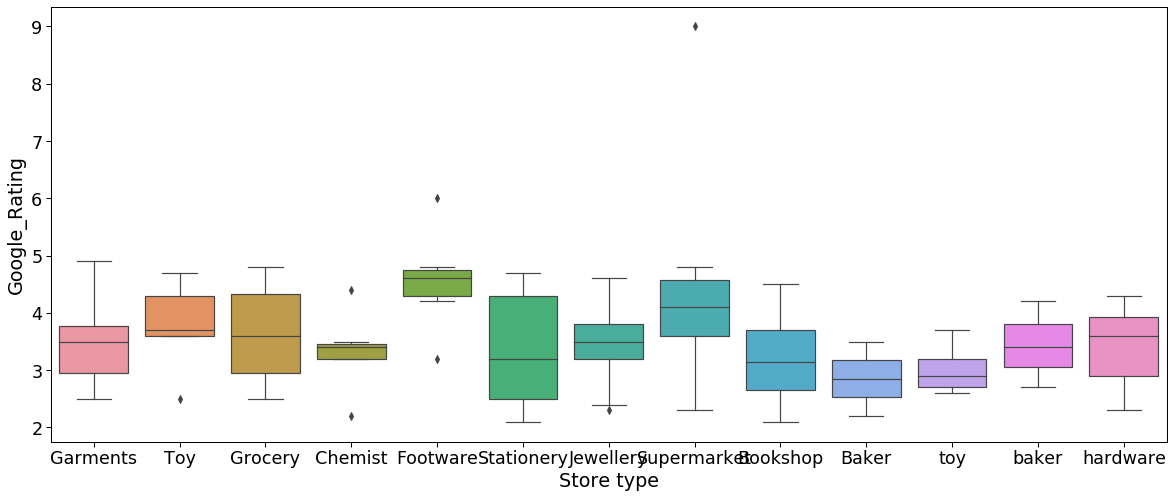

In [5]:
#using visualistaion
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))

sns.set_context('paper',font_scale=2)
#sns.distplot(x='Google_Rating',data=df)
sns.boxplot(x='Store type',y='Google_Rating',data=df)


## Replacing Google Rating with 0 where Google Rating <0 , >5 or =NaN

In [6]:
#outlier not within range [0,5]
import numpy as np

outlier=True
df1=df[(df['Google_Rating']<0) | (df['Google_Rating']>5)]
if(df1.empty):
    outlier=False
    
print(df1)


#replacing with 0

if(outlier==True):
    df['Google_Rating'].where((df['Google_Rating']>0) & (df['Google_Rating']<5),other=0,inplace=True)
    print(df[(df['Google_Rating']<0) | (df['Google_Rating']>5)])


print(df)

#removing rows from df where google rating is zero


df1=df[df.Google_Rating != 0]

print(df1)

    Application ID    Shopkeeper name                    Shopkeeper_ID  \
50      DCHIAM0051  ME. HITESH SHARMA        nelcotraders702@yahoo.com   
51      DCHIAM0052     MOHAN LAL GAUR  newbharatelectrical00@gmail.com   
106     DCHIAM0060                NaN                     qe@gmail.com   
162            NaN                NaN                      m@gmail.com   
163            NaN                NaN                      n@gmail.com   
274            NaN                NaN                     48@gmail.com   
330            NaN                NaN                    104@gmail.com   
331            NaN                NaN                    518@gmail.com   

                                 Store name   Store type  Google_Rating  \
50   ARORA INVERTER AND BATTERY DISTRIBUTOR  Supermarket            9.0   
51                             ASTHA AGENCY     Footware            6.0   
106                                     NaN          NaN            9.0   
162                              

## Training ML Model

In [7]:
from numpy import loadtxt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers



train_data =df1.iloc[:,5:9]
train_label = df1.iloc[:,9]
print(train_data)
print(train_label)


model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_data, train_label, epochs=150, batch_size=10)

_, accuracy = model.evaluate(train_data, train_label)
print('Accuracy: %.2f' % (accuracy*100))
predictions = model.predict_classes(train_data)

for i in range(5):
    print( predictions[i])
    

Using TensorFlow backend.


     Google_Rating  Number of lockers available  Number of working hours  \
0              4.2                          5.0                      8.0   
1              3.6                         10.0                      9.0   
2              4.3                         12.0                     12.0   
4              3.4                         33.0                     12.0   
5              4.5                         29.0                     11.0   
..             ...                          ...                      ...   
994            1.0                         12.0                      4.0   
995            4.0                         19.0                     24.0   
996            1.0                         15.0                     46.0   
998            1.0                         23.0                     28.0   
999            4.0                         10.0                      5.0   

     Number of working days  
0                       5.0  
1                       6.0

546/546 [==============================] - 0s 322us/step - loss: 0.3660 - accuracy: 0.8681
Epoch 66/150
546/546 [==============================] - 0s 315us/step - loss: 0.3586 - accuracy: 0.8571
Epoch 67/150
546/546 [==============================] - 0s 304us/step - loss: 0.3609 - accuracy: 0.8535
Epoch 68/150
546/546 [==============================] - 0s 322us/step - loss: 0.3629 - accuracy: 0.8370
Epoch 69/150
546/546 [==============================] - 0s 335us/step - loss: 0.3600 - accuracy: 0.8590
Epoch 70/150
546/546 [==============================] - 0s 291us/step - loss: 0.3505 - accuracy: 0.8626
Epoch 71/150
546/546 [==============================] - 0s 285us/step - loss: 0.3490 - accuracy: 0.8498
Epoch 72/150
546/546 [==============================] - 0s 282us/step - loss: 0.3488 - accuracy: 0.8571
Epoch 73/150
546/546 [==============================] - 0s 326us/step - loss: 0.3471 - accuracy: 0.8681
Epoch 74/150
546/546 [==============================] - 0s 254us/step - loss:

546/546 [==============================] - 0s 265us/step - loss: 0.2641 - accuracy: 0.8993
Epoch 144/150
546/546 [==============================] - 0s 251us/step - loss: 0.2764 - accuracy: 0.8901
Epoch 145/150
546/546 [==============================] - 0s 246us/step - loss: 0.2650 - accuracy: 0.8956
Epoch 146/150
546/546 [==============================] - 0s 269us/step - loss: 0.2663 - accuracy: 0.8938
Epoch 147/150
546/546 [==============================] - 0s 291us/step - loss: 0.2557 - accuracy: 0.8883
Epoch 148/150
546/546 [==============================] - 0s 267us/step - loss: 0.2635 - accuracy: 0.8883
Epoch 149/150
546/546 [==============================] - 0s 272us/step - loss: 0.2580 - accuracy: 0.8901
Epoch 150/150
546/546 [==============================] - 0s 250us/step
Accuracy: 90.11
[1]
[1]
[1]
[0]
[0]


## Creating object of model using pickle

In [8]:
import pickle
pickle1= "Pickle_Model.pk"
with open(pickle1,'wb') as file:
    pickle.dump(model,file)